# Task-5 strategic back testing
**A forecast and an optimized portfolio are hypotheses. A backtest is the experiment that validates a strategy by simulating its performance on historical data. In this task, i was simulate the performance of  proposed strategy and compare it against a simple benchmark**.


In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# load module

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.strategy_back_testing import load_data, simulate_portfolio, calculate_metrics, plot_cumulative_returns, summarize_performance

# RUN main Function
- used Backtesting Period: Use the last year of the dataset (e.g., August 1, 2024 - July 31, 2025) 
- Define a Benchmark: Creating a simple benchmark portfolio to compare against, such as a static 60% SPY / 40% BND    portfolio.
-  Simulation Your Strategy:
-  Start with the initial optimal weights which i found in Task 4.
-  the portfolio was hold for a set period (e.g., one month).
-  At the end of the month, i was ideally re-run my forecast and re-optimize.
-  Analyzing of Performance:
-   cumulative returns of strategy portfolio against the benchmark portfolio over the backtesting period was plotted 


Extracted weights: [0.0011 0.0168 0.9821]
Backtesting period: 2024-08-02 00:00:00 to 2025-07-30 00:00:00
Strategy Weights: {'TSLA': 0.0011, 'BND': 0.0168, 'SPY': 0.9821}
Benchmark Weights: {'TSLA': 0.0, 'BND': 0.4, 'SPY': 0.6}


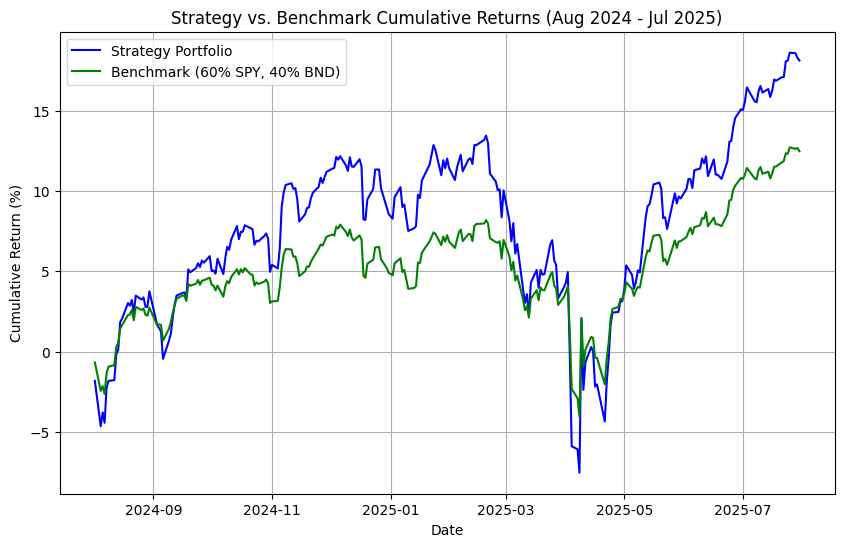

Cumulative returns plot saved to plots/backtesting/task5_cumulative_returns.png
Backtesting summary saved to data/output/task5_backtesting_summary.txt

Task 5: Strategy Backtesting Summary
Backtesting Period: August 1, 2024 - July 31, 2025
Strategy Portfolio:
  Total Return: 0.1811 (18.11%)
  Annualized Sharpe Ratio: 0.7966
Benchmark Portfolio (60% SPY, 40% BND):
  Total Return: 0.1247 (12.47%)
  Annualized Sharpe Ratio: 0.7800
Conclusion:
The strategy portfolio outperforms the benchmark. Higher total return and Sharpe Ratio indicate the model-driven approach effectively leverages TSLA’s forecast. This suggests the forecasting and optimization approach is viable but may require dynamic rebalancing to improve performance.


In [3]:
# run main function 
def main():
    """
    Main function to execute Task 5 backtesting.
    """
    # Parameters
    tsla_path = 'F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/TSLA_data.csv'
    bnd_path = 'F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/BND_data.csv'
    spy_path = 'F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/scrap data/SPY_data.csv'
    portfolio_summary_path = 'F:/Time-Series-Forecasting-for-Portfolio-Management-Optimization-/data/dataf/output/portfolio_summary.txt'
    start_date = '2024-08-01'
    end_date = '2025-07-31'
    output_dir = 'data/output'
    plot_dir = 'plots/backtesting'
    risk_free_rate = 0.03 / 252  # Daily risk-free rate
    
    # Load data and weights
    returns, strategy_weights, benchmark_weights = load_data(tsla_path, bnd_path, spy_path, portfolio_summary_path, start_date, end_date)
    if returns is None:
        return
    
    # Simulate portfolios
    strategy_returns, strategy_cumulative = simulate_portfolio(returns, strategy_weights)
    benchmark_returns, benchmark_cumulative = simulate_portfolio(returns, benchmark_weights)
    
    # Calculate metrics
    strategy_metrics = calculate_metrics(strategy_returns, risk_free_rate)
    benchmark_metrics = calculate_metrics(benchmark_returns, risk_free_rate)
    
    # Plot cumulative returns
    plot_cumulative_returns(strategy_cumulative, benchmark_cumulative, plot_dir)
    
    # Summarize performance
    summarize_performance(strategy_metrics, benchmark_metrics, output_dir)


if __name__ == "__main__":
    main()